<a href="https://colab.research.google.com/github/Ftajedini/Github_Tutorial/blob/main/sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sarcasm Detection: Deep NLP Models
##Download Dataset

In [3]:
# Download Dataset

#!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/sarcasm.json -O /tmp/sarcasm.json
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/sarcasm.json

--2023-12-06 08:22:39--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.207, 74.125.141.207, 173.194.210.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2023-12-06 08:22:39 (187 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



Read Dataset

In [90]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Read dataset
df = pd.read_json("/content/sarcasm.json")
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df.shape

(26709, 3)

In [25]:
sentences = df['headline']
labels = df['is_sarcastic']

#pre_process

In [47]:
# har kalame bod hazf kon
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [48]:
sentences[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [51]:
words = sentences[0].split()
words_new = [w for w in words if w not in sw]
print(' '.join(words_new))

former versace store clerk sues secret 'black code' minority shoppers


In [52]:
for i in range(len(sentences)):
  words = sentences[i].split()
  words_new = [w for w in words if w not in sw]
  sentences[i]= ' '.join(words_new)

<ipython-input-52-72a6361dbfc9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentences[i]= ' '.join(words_new)


In [76]:
MAX_TOKENS = 5000
SEQUENCE_LENGHT = 25
TRAINING_SIZE = 23000
EMBEDDING_DIM = 10

In [77]:
train_sentenses = np.array(sentences[:TRAINING_SIZE])
validation_sentenses =np.array(sentences [TRAINING_SIZE:])

train_labels = np.array(labels[:TRAINING_SIZE])
validation_lables = np.array(labels[TRAINING_SIZE:])

In [79]:
vectorizer = layers.TextVectorization(max_tokens=MAX_TOKENS,output_sequence_length=SEQUENCE_LENGHT)
vectorizer.adapt(train_sentenses)


In [80]:
train_sequences = vectorizer(train_sentenses)
validation_sequences = vectorizer(validation_sentenses)

print(train_sequences.shape)
print(validation_sequences.shape)

(23000, 25)
(3709, 25)


## Model Design

Embedding dem
ما در عدد مفهوم کلمه نمیتونیم بدیم ولی به وکتور و بردار می تونیم
/ بعد Embedding


In [81]:
model1 = Sequential([
    layers.Embedding(MAX_TOKENS,EMBEDDING_DIM),
    layers.GlobalAveragePooling1D(),
    layers.Dense(24,activation ='relu'),
    layers.Dense(1,activation='sigmoid')
])

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 10)          50000     
                                                                 
 global_average_pooling1d_2  (None, 10)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 24)                264       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 50289 (196.44 KB)
Trainable params: 50289 (196.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model1.compile( loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [83]:
history1 = model1.fit( train_sequences, train_labels,
          epochs=50,
          validation_data = (validation_sequence, validation_lables)
          )

Epoch 1/50
719/719 [==============================] - 3s 4ms/step - loss: 0.6198 - accuracy: 0.6414 - val_loss: 0.9660 - val_accuracy: 0.4352
Epoch 2/50
719/719 [==============================] - 2s 3ms/step - loss: 0.4151 - accuracy: 0.8113 - val_loss: 1.2964 - val_accuracy: 0.4419
Epoch 3/50
719/719 [==============================] - 3s 4ms/step - loss: 0.3489 - accuracy: 0.8435 - val_loss: 1.4392 - val_accuracy: 0.4519
Epoch 4/50
719/719 [==============================] - 3s 4ms/step - loss: 0.3213 - accuracy: 0.8574 - val_loss: 1.5171 - val_accuracy: 0.4551
Epoch 5/50
719/719 [==============================] - 3s 4ms/step - loss: 0.3051 - accuracy: 0.8666 - val_loss: 1.6026 - val_accuracy: 0.4581
Epoch 6/50
719/719 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.8715 - val_loss: 1.6540 - val_accuracy: 0.4624
Epoch 7/50
719/719 [==============================] - 2s 3ms/step - loss: 0.2877 - accuracy: 0.8751 - val_loss: 1.7065 - val_accuracy: 0.4629
Epoch 

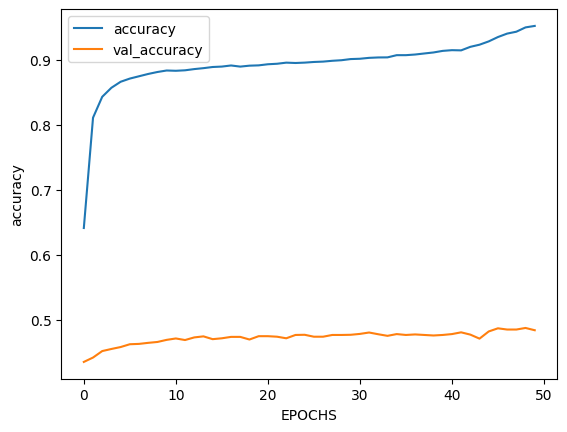

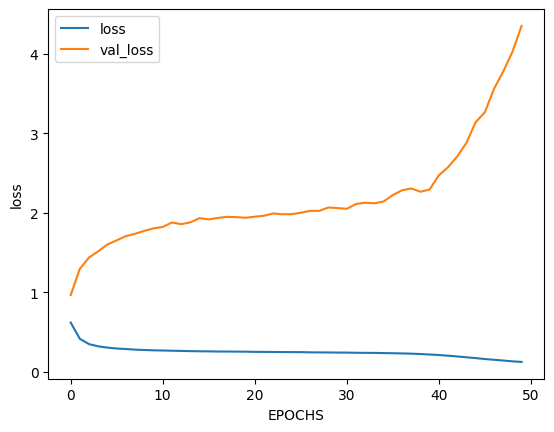

In [84]:
def plot_graphs(history1, string):
    plt.plot(history1.history[string])
    plt.plot(history1.history['val_'+string])
    plt.xlabel("EPOCHS")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()


plot_graphs(history1,"accuracy")
plot_graphs(history1, "loss")




In [88]:
test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
                  "It's a beautiful sunny day",
                  "game of thrones season finale showing this sunday night"]


test_seq = vectorizer(test_sentences)
preds = model1.predict(test_seq)
print([float(p) for p in preds])

1/1 [==============================] - 0s 24ms/step
[1.5622640984688796e-12, 0.5303245186805725, 2.304605288827588e-07]


#Pretrain

In [91]:
import tensorflow_hub as hub
import tensorflow as tf

hub_layer = hub.KerasLayer(
    #"https://tfhub.dev/google/tf2-preview/gnew-swivel-20dim/1"
    "https://www.kaggle.com/models/google/gnew-swivel/frameworks/Tensorflow2/variations/tf2-preview-20dim/versions/1",
    output_shape=[20], input_shape=[],
    dtype = tf.string, trainable=False
)

HTTPError: ignored

In [ ]:
model2.Sequential([
    hub_layer,
    layers.Dense(24,activation ='relu'),
    layers.Dense(1,activation='sigmoid')
])
 model2.summary()

In [ ]:
model2.compile( loss='binary_crossentropy',
              optimizer = optimizers.Adam (learning_rate = 0.0001),
              metrics = ['accuracy'])

In [ ]:
history2 = model1.fit( train_sequences, train_labels,
          epochs=50,
          validation_data = (validation_sequence, validation_lables)
          )

In [ ]:
#https://projector.tensorflow.org/